import pandas as pd
import numpy as np
df = pd.read_excel("housing_data.xlsx")

In [3]:
df["income_cat"] = pd.cut(df["median_income"],
                             bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                             labels=[1, 2, 3, 4, 5])

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assume income_cat is a column in the dataset created from median_income
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [5]:
#lets remove income category
for sett in (strat_train_set, strat_test_set):
    sett.drop("income_cat", axis=1, inplace=True)
    

In [6]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,INLAND
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,NEAR OCEAN
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,INLAND
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,NEAR OCEAN
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14,6665,1231.0,2026,1001,5.0900,268500,<1H OCEAN
12661,-121.42,38.51,15,7901,1422.0,4769,1418,2.8139,90400,INLAND
19263,-122.72,38.44,48,707,166.0,458,172,3.1797,140400,<1H OCEAN
19140,-122.70,38.31,14,3155,580.0,1208,501,4.1964,258100,<1H OCEAN


In [7]:
df = strat_train_set.copy()

<Axes: title={'center': 'Map'}, xlabel='latitude', ylabel='longitude'>

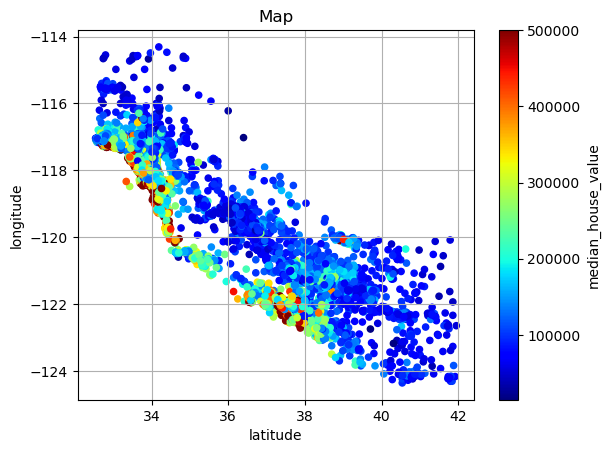

In [8]:
df.plot(kind="scatter", y="longitude", x="latitude", grid=True, title="Map" , cmap="jet", c="median_house_value")

In [9]:
features = df.drop("median_house_value", axis=1).copy()
housing_labels = df["median_house_value"]


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  int64  
 3   total_rooms         16512 non-null  int64  
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  int64  
 6   households          16512 non-null  int64  
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 1.3+ MB


In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
features_num = features.select_dtypes(include=[np.number])

feature_pure = imputer.fit_transform(features_num)

In [12]:
 feature_df = pd.DataFrame(feature_pure, columns=features_num.columns, index=features_num.index)

In [13]:
feature_df["ocean_proximity"] = features["ocean_proximity"]

In [14]:
feature_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [15]:
feature_cat = features[["ocean_proximity"]]

In [16]:
feature_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [17]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False)
feature_cat_1hot = cat_encoder.fit_transform(feature_cat)

In [18]:
feature_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [19]:
features_df = pd.DataFrame(feature_cat_1hot, columns=['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], index=feature_df.index)

In [20]:
features_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
15174,1.0,0.0,0.0,0.0,0.0
12661,0.0,1.0,0.0,0.0,0.0
19263,1.0,0.0,0.0,0.0,0.0
19140,1.0,0.0,0.0,0.0,0.0


In [21]:
feature_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [22]:
feature_df = pd.concat([feature_df, features_df], axis=1)

In [23]:
feature_df = feature_df.drop("ocean_proximity", axis=1)

In [24]:
feature_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0.0,1.0,0.0,0.0,0.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,0.0,0.0,0.0,1.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0.0,1.0,0.0,0.0,0.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,0.0,0.0,0.0,1.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.0,0.0,0.0,0.0,0.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,0.0,1.0,0.0,0.0,0.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,1.0,0.0,0.0,0.0,0.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.0,0.0,0.0,0.0,0.0


In [25]:
#using z-scrore
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
feature_zScl = std_scaler.fit_transform(feature_df)

In [26]:
housing_prepared = pd.DataFrame(feature_zScl, columns=feature_df.columns, index=feature_df.index)

In [27]:
housing_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.887683,1.46218,-0.011006,-0.354889,-0.384217
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,-0.887683,-0.68391,-0.011006,-0.354889,2.602693
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.887683,1.46218,-0.011006,-0.354889,-0.384217
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.887683,-0.68391,-0.011006,-0.354889,2.602693
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,-0.887683,1.46218,-0.011006,-0.354889,-0.384217
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,1.126529,-0.68391,-0.011006,-0.354889,-0.384217


In [28]:
df_test = strat_test_set.drop("median_house_value", axis=1).copy()

In [29]:
y_df_test = strat_test_set[["median_house_value"]]

In [30]:
y_df_test

,median_house_value
5241,500001
17352,162500
3505,204600
7777,159700
14155,184000
...,...
12182,110000
7275,118800
17223,293800
10786,335700


In [31]:
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29,6447,1012.0,2184,960,8.2816,<1H OCEAN
17352,-120.42,34.89,24,2020,307.0,855,283,5.0099,<1H OCEAN
3505,-118.45,34.25,36,1453,270.0,808,275,4.3839,<1H OCEAN
7777,-118.10,33.91,35,1653,325.0,1072,301,3.2708,<1H OCEAN
14155,-117.07,32.77,38,3779,614.0,1495,614,4.3529,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19,2248,427.0,1207,368,2.8170,<1H OCEAN
7275,-118.24,33.99,33,885,294.0,1270,282,2.1615,<1H OCEAN
17223,-119.72,34.44,43,1781,342.0,663,358,4.7000,<1H OCEAN
10786,-117.91,33.63,30,2071,412.0,1081,412,4.9125,<1H OCEAN


In [32]:
df_test_cat = df_test[["ocean_proximity"]]

In [33]:
df_test_1hot = cat_encoder.fit_transform(df_test_cat)

In [34]:
df_test_1hot_dataframe = pd.DataFrame(df_test_1hot, columns=['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], index=df_test.index)

In [35]:
df_test = pd.concat([df_test, df_test_1hot_dataframe], axis=1).drop("ocean_proximity", axis=1).copy()

In [36]:
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5241,-118.39,34.12,29,6447,1012.0,2184,960,8.2816,1.0,0.0,0.0,0.0,0.0
17352,-120.42,34.89,24,2020,307.0,855,283,5.0099,1.0,0.0,0.0,0.0,0.0
3505,-118.45,34.25,36,1453,270.0,808,275,4.3839,1.0,0.0,0.0,0.0,0.0
7777,-118.10,33.91,35,1653,325.0,1072,301,3.2708,1.0,0.0,0.0,0.0,0.0
14155,-117.07,32.77,38,3779,614.0,1495,614,4.3529,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19,2248,427.0,1207,368,2.8170,1.0,0.0,0.0,0.0,0.0
7275,-118.24,33.99,33,885,294.0,1270,282,2.1615,1.0,0.0,0.0,0.0,0.0
17223,-119.72,34.44,43,1781,342.0,663,358,4.7000,1.0,0.0,0.0,0.0,0.0
10786,-117.91,33.63,30,2071,412.0,1081,412,4.9125,1.0,0.0,0.0,0.0,0.0


In [37]:
test_prepared = std_scaler.fit_transform(df_test)

In [38]:
test_prepared = pd.DataFrame(test_prepared, columns=df_test.columns, index=df_test.index).copy()

In [39]:
test_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5241,0.575070,-0.696573,0.032956,1.602218,1.017175,0.614330,1.104803,2.358455,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
17352,-0.434801,-0.334668,-0.362981,-0.285055,-0.534073,-0.495927,-0.556024,0.617359,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
3505,0.545222,-0.635472,0.587268,-0.526772,-0.615486,-0.535191,-0.575650,0.284222,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
7777,0.719338,-0.795274,0.508081,-0.441510,-0.494467,-0.314643,-0.511866,-0.308135,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
14155,1.231735,-1.331081,0.745643,0.464824,0.141435,0.038734,0.255990,0.267724,-0.905154,-0.67382,-0.026968,-0.346723,2.594289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12182,1.122291,-0.884575,-0.758918,-0.187856,-0.270031,-0.201863,-0.347501,-0.549633,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
7275,0.649691,-0.757673,0.349706,-0.768916,-0.562678,-0.149232,-0.558477,-0.898470,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
17223,-0.086570,-0.546171,1.141580,-0.386942,-0.457061,-0.656325,-0.372033,0.452440,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
10786,0.813858,-0.926876,0.112144,-0.263313,-0.303036,-0.307125,-0.239559,0.565526,1.104784,-0.67382,-0.026968,-0.346723,-0.385462


In [40]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(housing_prepared, housing_labels)
prediction = model.predict(test_prepared)

In [41]:
prediction

array([477785.56, 207583.04, 217046.01, ..., 356167.17, 269098.  ,
       219334.  ])

In [42]:
#Evaluation of model accuracy
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_df_test, prediction)
mse = mean_squared_error(y_df_test, prediction)
print("MSE:", mse)
print("R2 Score:", r2)
import numpy as np
rmse = np.sqrt(mse)
print("RMSE:", rmse)

MSE: 2899982760.6618147
R2 Score: 0.7774918014795367
RMSE: 53851.488007870445
